<a href="https://colab.research.google.com/github/XiaoxueRan/hku_phys3151_2022/blob/main/Assignment_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Properties of logistic function $g(z)$

It is easy to prove the three relations by hand. The solutions are 
$$
g(z)+g(-z)=\frac{1}{1+e^{-z}}+\frac{1}{1+e^{z}}=\frac{e^{z}}{e^{z}+1}+\frac{1}{e^{z}+1}=1
$$

$$
g'(z)=\frac{e^{-z}}{(1+e^{-z})^2}=g(z)(1-g(z))=g(z)g(-z)
$$

$$
g'(-z)=\frac{e^{z}}{(1+e^{z})^2}=\frac{e^{z}e^{-2z}}{e^{-2z}(1+e^{z})^2}=\frac{e^{-z}}{(1+e^{-z})^2}=g'(z）
$$

Then we try to draw $g(z)$ at different values of $T$. It is obvious that when $T\rightarrow 0$, $g(z)$ will converge to a Heaviside step function.

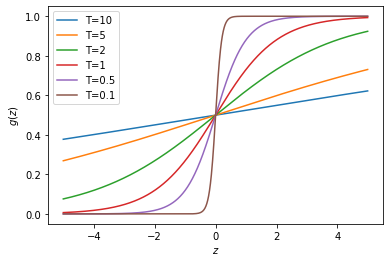

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def g(z,T):
    return 1./(1+np.exp(-z/T))

x=np.arange(-5,5,0.01)
y1=[g(it,10.) for it in x]
y2=[g(it,5.0) for it in x]
y3=[g(it,2.0) for it in x]
y4=[g(it,1.0) for it in x]
y5=[g(it,0.5) for it in x]
y6=[g(it,0.1) for it in x]

plt.figure()
plt.plot(x,y1,label='T=10')
plt.plot(x,y2,label='T=5')
plt.plot(x,y3,label='T=2')
plt.plot(x,y4,label='T=1')
plt.plot(x,y5,label='T=0.5')
plt.plot(x,y6,label='T=0.1')
plt.legend()
plt.ylabel('$g(z)$')
plt.xlabel('$z$')
plt.show()

# 2. LogisticRegression

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [ ]:
!git clone https://github.com/XiaoxueRan/hku_phys3151_2022

fatal: destination path 'hku_phys3151_2022' already exists and is not an empty directory.


In [ ]:
df1 = pd.read_csv("/content/hku_phys3151_2022/logistic-regression/assignment3_data/background_sample.csv",sep=",")
df2 = pd.read_csv("/content/hku_phys3151_2022/logistic-regression/assignment3_data/signal_sample.csv",sep=",")
print(df2)

     variable1  variable2
0     0.396252  65.827074
1     0.315459  95.244416
2     0.861467 -19.072701
3     0.785412  39.808397
4     0.697883  76.384968
..         ...        ...
231   0.871332  94.729109
232   0.812511  97.818767
233   0.369092  98.534094
234   0.882313  41.146300
235   0.628656  76.787022

[236 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
df1 = df1.to_numpy()
df2 = df2.to_numpy()
x1=df1[:,0]
y1=df1[:,1]
x2=df2[:,0]
y2=df2[:,1]

Let's have a look at a scatter plot of these two variables, both for signal and for the background sample.

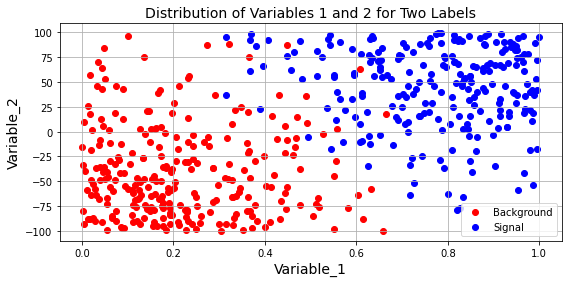

In [ ]:
plt.rcParams['figure.figsize'] = (9.0, 4.0)
plt.scatter(x1,y1, color='blue',label='Background')
plt.scatter(x2,y2, color='red',label='Signal')
plt.title('Distribution of Variables 1 and 2 for Two Labels', fontsize=14)
plt.xlabel('Variable_1', fontsize=14)
plt.ylabel('Variable_2', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Logistic Regression

Then we define the functions we need as before.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def  computeCost(theta,X,y):
    
    m = float(len(y))
    
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost

In [ ]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations"
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        #print(prediction)
        #print(np.dot(X.T,prediction - y))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

### Feature Scaling

Now, we prepare the data for computation, including feature scaling and adding a column to X to fit $\theta$.

In [ ]:
x1 = [df1[:,0],df1[:,1]]
x2 = [df2[:,0],df2[:,1]]
x1 = np.array(x1)
x2 = np.array(x2)
x1=x1.T
x2=x2.T
yb=[[0]]*len(x1)
ys=[[1]]*len(x2)
yb = np.array(yb)
ys = np.array(ys)

x = np.vstack((x1,x2))
y = np.vstack((yb,ys))
y = y.reshape((len(y),1))
n = x.shape[1]+1
print(x)

[[ 4.44432207e-01 -2.10731496e+01]
 [ 4.39282091e-02  4.25494213e+01]
 [ 3.00236288e-01 -9.31719579e+01]
 ...
 [ 3.69091854e-01  9.85340937e+01]
 [ 8.82313101e-01  4.11462995e+01]
 [ 6.28656405e-01  7.67870219e+01]]


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(x)
print(X_scaled.shape)
print(scaler)
X = X_scaled

(507, 2)
RobustScaler()


In [ ]:
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((n,1))
print(X_b)

[[ 1.         -0.00616371 -0.20262133]
 [ 1.         -0.66525498  0.37482454]
 [ 1.         -0.2434604  -0.85699853]
 ...
 [ 1.         -0.13014792  0.88294796]
 [ 1.          0.71443702  0.36208965]
 [ 1.          0.2970057   0.685569  ]]


### Implementation

With the data ready, we can now implement the functions to get the coefficients(parameters) in the hypothesis.

In [ ]:
alpha =0.1
n_iter =1000

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)
print(theta)

[[-0.52301348]
 [ 4.83646208]
 [ 2.65997812]]


### Decision Boundary

In [ ]:
#y=1 Signal(yes)
yes_x=[]
yes_y=[]
#y=0 Background(no)
no_x=[]
no_y=[]
for i in range(0,507):
    if y[i]==0:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

print(X_b)

[[ 1.         -0.00616371 -0.20262133]
 [ 1.         -0.66525498  0.37482454]
 [ 1.         -0.2434604  -0.85699853]
 ...
 [ 1.         -0.13014792  0.88294796]
 [ 1.          0.71443702  0.36208965]
 [ 1.          0.2970057   0.685569  ]]


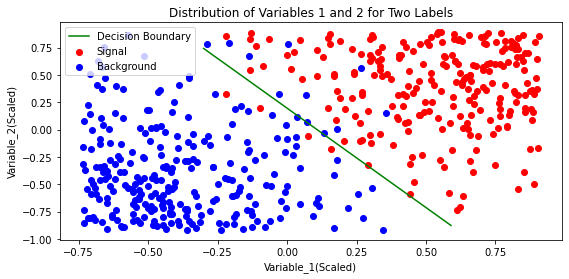

In [ ]:
plt.xlabel('Variable_1(Scaled)')
plt.ylabel('Variable_2(Scaled)')
plt.title('Distribution of Variables 1 and 2 for Two Labels')
xx=np.arange(-0.3,0.6,0.01)
yy=(-4.83646208/2.65997812)*xx+(0.52301348/2.65997812)
plt.plot(xx,yy,label='Decision Boundary',color='green' )
plt.scatter(yes_x,yes_y,color='red',label='Signal')
plt.scatter(no_x,no_y,color='blue',label='Background')
plt.legend()

# 3. Support vector machine

## (a)

The normal vector is (2,3). The distance of the straight line to the origin is $\frac{\sqrt{13}}{13}$. The distance of $(x_{0},y_{0})$ to the line is $\frac{|2x_{0}+3y_{0}-1|}{\sqrt{13}}$.

## (b)

In [ ]:
## Example 4
#prepare data
X=np.zeros([200,2])
y=np.zeros(200)
for i in range(0,100):
    rx=500*(np.random.rand())+100
    X[i][0]=rx
    ry=500-rx+(np.random.rand())*2000
    X[i][1]=ry
    y[i]=1
for i in range(100,200):
    rx=-500*(np.random.rand())-100
    X[i][0]=rx
    ry=-(500-rx+(np.random.rand())*2000)
    X[i][1]=ry
    y[i]=-1

In [ ]:
#data processing
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X=X_scaled
y = y.reshape((len(y),1))
X_b = np.c_[np.ones((len(X),1)),X]
n=X_b.shape[1]
theta = np.random.random((n,1))
print(X_b)

[[ 1.          0.85168123  0.13435889]
 [ 1.          0.42131334  0.71652241]
 [ 1.          0.73070754  0.31715003]
 [ 1.          0.66749172  0.18850351]
 [ 1.          0.25904143  0.49646656]
 [ 1.          0.15847253  0.58332895]
 [ 1.          0.83941847  0.57241284]
 [ 1.          0.66778129  0.16322391]
 [ 1.          0.55492249  0.31213581]
 [ 1.          0.16401699  0.77120921]
 [ 1.          0.85517897  0.37617762]
 [ 1.          0.41923825  0.62444822]
 [ 1.          0.55952601  0.52097203]
 [ 1.          0.84690395  0.12603343]
 [ 1.          0.17038547  0.6232525 ]
 [ 1.          0.24558852  0.37036   ]
 [ 1.          0.23078748  0.45662694]
 [ 1.          0.17740603  0.54964697]
 [ 1.          0.44286793  0.48931317]
 [ 1.          0.35143744  0.3238553 ]
 [ 1.          0.30487383  0.58516758]
 [ 1.          0.27124608  0.46866707]
 [ 1.          0.80546557  0.74649144]
 [ 1.          0.31086196  0.21992445]
 [ 1.          0.75146632  0.63222875]
 [ 1.          0.73957532

In [ ]:
def hinge(X_b,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X_b.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X_b,y,theta,reg):
    m = float(len(y))
    theta2 = np.square(theta)
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X_b,y,theta)
    return cost

def check(X_b,y,theta):
    
    fx = np.multiply(y,(X_b.dot(theta)))
    
    check = np.less(fx,np.ones(fx.shape))
    
    check = np.where(check==True,1,0)
    
    return check

def subgradient_descent(X_b,y,theta,iterations,reg2):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    
    cost_history = np.zeros(iterations)
    
    theta_history = np.zeros((iterations,X_b.shape[1]))
    
    for it in range(iterations):
        alpha = 0.001
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X_b,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg2*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)
        
    return theta, cost_history, theta_history

In [ ]:
reg2 = 0
reg = 0
n_iter = 500000
theta,cost_history,theta_history = subgradient_descent(X_b,y,theta,n_iter,reg2)
print(theta)

[[-0.16103394]
 [ 2.63405535]
 [ 2.39295286]]


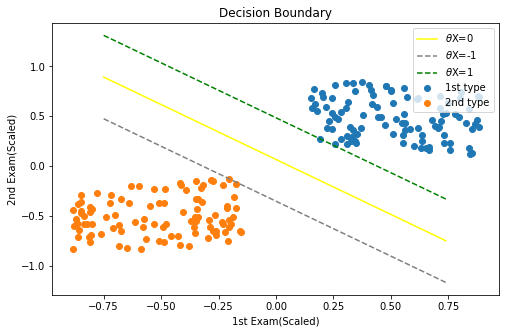

In [ ]:
#y=1 admitted(yes)
yes_x=[]
yes_y=[]
#y=0 not admitted(no)
no_x=[]
no_y=[]
for i in range(0,200):
    if y[i]== -1:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])
plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta[1]/theta[2])*x+(-theta[0]/theta[2])#=0
y2=(-theta[1]/theta[2])*x+((-theta[0]-1)/theta[2])#=-1
y3=(-theta[1]/theta[2])*x+((-theta[0]+1)/theta[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

## (c)

### Support vector machine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/hku_phys3151_2022/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(50,100))
df = df.drop(df.index[rows])

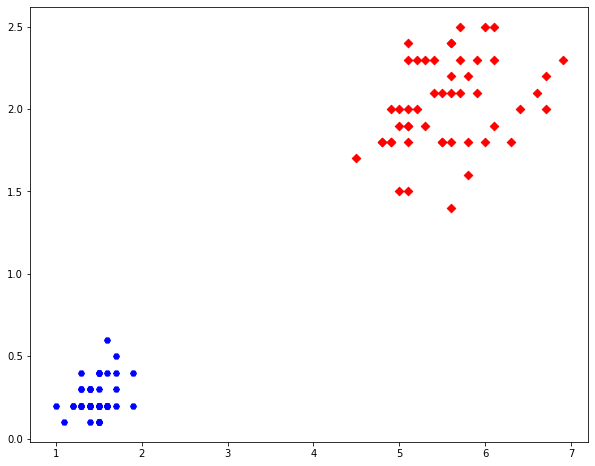

In [ ]:
x = df['PetalLengthCm']
y = df['PetalWidthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop the other two features and extract the target values

df = df.drop(['SepalLengthCm','SepalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and testing set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(80,1)
y_test = y_test.reshape(20,1)

In [ ]:
# start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((80,1))
train_f1 = train_f1.reshape(80,1)
train_f2 = train_f2.reshape(80,1)

w1 = np.zeros((80,1))
w2 = np.zeros((80,1))
w0 = np.zeros((80,1))

epochs = 1
alpha = 0.01

while (epochs < 50000):
    y = w1 * train_f1 + w2 * train_f2 - w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 - alpha * (train_f0[count] * y_train[count])
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

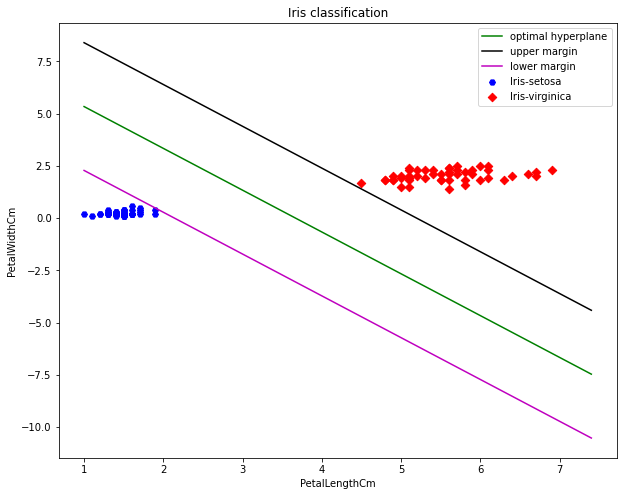

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue',label='Iris-setosa')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red',label='Iris-virginica')
x = np.arange(1.0,7.5,0.1)
y = -(w1[-1]/w2[-1])*x + w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x + (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x + (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Iris classification')
plt.show()

In [ ]:
print(w0[-1],w1[-1],w2[-1])

[2.4] [0.65456776] [0.32729683]


### Logistic regression

In [ ]:
X_b = np.c_[np.ones((len(X),1)),X]
for i in range(len(Y)):
    if Y[i]==-1:
        Y[i]=0
theta = np.zeros((3,1))
Y=np.array(Y)
Y=Y.reshape((len(Y),1))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def  computeCost(theta,X,y):
    
    m = float(len(y))
    
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations"
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        #print(prediction)
        #print(np.dot(X.T,prediction - y))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

In [ ]:
alpha =0.01
n_iter =50000

theta,cost_history,theta_history = gradient_descent(X_b,Y,theta,alpha,n_iter)
print(theta)

[[-7.53113711]
 [ 1.33876586]
 [ 3.29192864]]


In [ ]:
#y=1 Iris-virginica(yes)
yes_x=[]
yes_y=[]
#y=0 Iris-setosa(no)
no_x=[]
no_y=[]
for i in range(0,65):
    if Y[i]==0:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

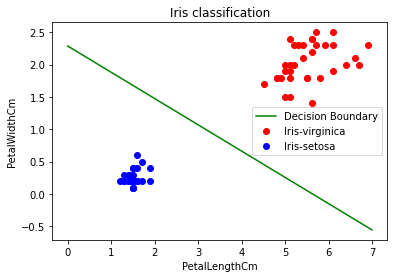

In [ ]:
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Iris classification')
x=np.arange(0,7,0.01)
y=(-theta[1][0]/theta[2][0])*x+(-theta[0][0]/theta[2][0])
plt.plot(x,y,label='Decision Boundary',color='green' )
plt.scatter(yes_x,yes_y,label='Iris-virginica',c='r')
plt.scatter(no_x,no_y,label='Iris-setosa',c='b')
plt.legend()